<a href="https://colab.research.google.com/github/tozanni/Data_Science_Notebooks/blob/main/Kernel_Density_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity


Generamos 200 valores aleatorios distribuidos normalmente 
con media 5 y desviación estándar de 1.

Indicamos que la forma de la salida sea un array de Nx1, es decir 200 renglones y una columna. Esta forma nos conviene facilitar el uso de las funciones de graficación de Matplotlib.

In [63]:
np.random.seed(1)
N = 200
X = np.random.normal(5, 1, (N,1))

#Mostrar primeros 10 valores generados
X[:10]

array([[6.62434536],
       [4.38824359],
       [4.47182825],
       [3.92703138],
       [5.86540763],
       [2.6984613 ],
       [6.74481176],
       [4.2387931 ],
       [5.3190391 ],
       [4.75062962]])

In [64]:
X.shape

(200, 1)

### Estimación de densidad mediante histograma con 5 bines


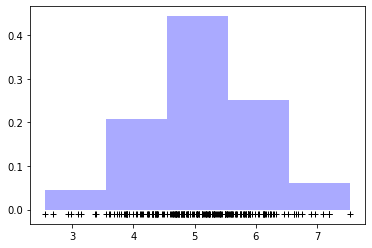

In [65]:
fig, ax = plt.subplots()
ax.hist(X[:, 0], bins=5, fc="#AAAAFF", density=True)
ax.plot(X[:, 0], np.full(X.shape[0], -0.01), "+k")


### Estimación de densidad mediante histograma con 25 bines

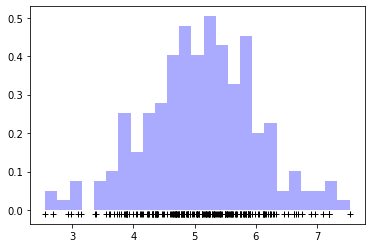

In [66]:
fig, ax = plt.subplots()
ax.hist(X[:, 0], bins=25, fc="#AAAAFF", density=True)
ax.plot(X[:, 0], np.full(X.shape[0], -0.01), "+k")


### Estimación de densidad gausssiana con parámetro de ancho de banda = 0.75

In [83]:
# Seleccion del parámetro de ancho de banda por "regla de dedo"
from math import pow

h = pow(4*pow(np.std(X),5) / (3*N) , 1/5)
h

0.3340758523895948

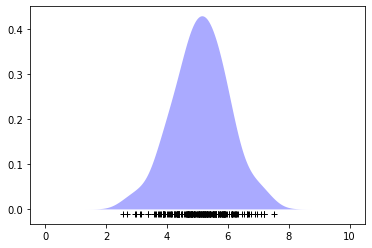

In [84]:
# Estimación de densidad de probabilidad con kernel Gaussiano (KDE) y bandwidth=0.75

kde = KernelDensity(kernel="gaussian", bandwidth=h).fit(X)
X_plot = np.linspace(0, 10, 1000)[:, np.newaxis]
log_dens = kde.score_samples(X_plot)

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax.plot(X[:, 0], np.full(X.shape[0], -0.01), "+k")